In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from scipy.optimize import minimize
%matplotlib inline

In [13]:
iris_dataset=load_iris()
print(iris_dataset)

{'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], 'target_names': array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10'), 'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal

In [14]:
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['feature_names', 'target_names', 'DESCR', 'data', 'target'])


In [15]:
print(iris_dataset['DESCR'])
print("\n.................................")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [16]:
print("Target Names: {}".format(iris_dataset['target_names']))

Target Names: ['setosa' 'versicolor' 'virginica']


In [17]:
print("Target Names: {}".format(iris_dataset['target_names']))

Target Names: ['setosa' 'versicolor' 'virginica']


In [18]:
print("type of data {}".format(type(iris_dataset['data'])))

type of data <class 'numpy.ndarray'>


In [19]:
print("shape of the numpy array {}".format(iris_dataset['data'].shape))

shape of the numpy array (150, 4)


In [20]:
print("first five rows of the dataset\n{}".format(iris_dataset['data'][:5]))


first five rows of the dataset
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [21]:
print(type(iris_dataset))

<class 'sklearn.datasets.base.Bunch'>


In [39]:
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [41]:
def sigmoid(X,theta_t):
    return 1/(1+np.exp(-np.dot(X,theta_t)))
    

In [42]:
def lrcostfunction(theta_t,X,y,lambd):
    m,n=X.shape
    theta_t=np.reshape(theta_t,(n,1))
    grad=np.zeros(theta_t.shape)
    q1=(lambd/(2*m))*np.sum(np.power(theta_t[1:n,0],2))
    cost=-(1/m)*(np.dot(y.T,np.log(sigmoid(X,theta_t)))+np.dot((1-y).T,np.log(1-sigmoid(X,theta_t))))+q1
    grad=(1/m)*np.dot(X.T,np.subtract(sigmoid(X,theta_t),y))+(lambd/m)*theta_t
    grad[0,0]=(1/m)*np.dot(X[:,0].T,np.subtract(sigmoid(X,theta_t),y))
    return cost,grad

In [43]:
def onevsall(X,y,num_labels,lambd):
    m=X.shape[0]
    X=np.insert(X,0,[1],axis=1)
    n=X.shape[1]
    all_theta=np.zeros((num_labels,n))
    for i in range(num_labels):
        y_t=(y==i)
        theta=all_theta[i,:].T
        theta=np.reshape(theta,(n,1))
        fmin=minimize(fun=lrcostfunction,x0=theta,args=(X,y_t,lambd),method='TNC',jac=True)
        all_theta[i,:]=fmin.x
        grad=fmin.jac
    return all_theta

In [44]:
def predictonevsall(all_theta,X):
    X=np.insert(X,0,[1],axis=1)
    q=np.zeros((X.shape[0],1))
    p=np.zeros((X.shape[0],1))
    v=np.dot(X,all_theta.T)
    q=np.argmax(v,axis=1)
    q=np.reshape(q,(X.shape[0],1))
    return q
    

In [65]:
y_train=np.reshape(y_train,(X_train.shape[0],1))
y_test=np.reshape(y_test,(X_test.shape[0],1))
all_theta=onevsall(X_train,y_train,3,0.1)
q=predictonevsall(all_theta,X_test)
accuracy=np.mean(y_test==q)*100
print("The accuracy of the classifier with the test case is:",accuracy,"%")


The accuracy of the classifier with the test case is: 97.3684210526 %


iris_train=pd.DataFrame(X_train,columns=iris_dataset['feature_names'])
iris_ytrain=pd.DataFrame(y_train)
iris_test=pd.DataFrame(X_test,columns=iris_dataset['feature_names'])
iris_ytest=pd.DataFrame(y_test)
print(iris_test)

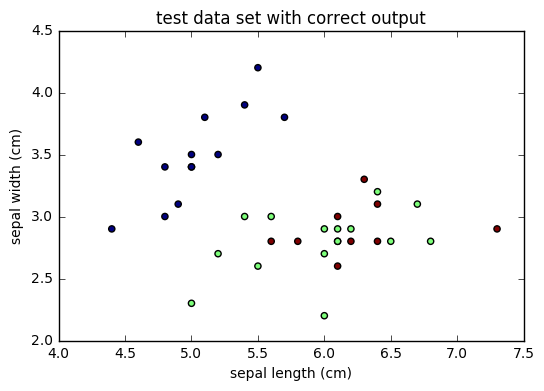

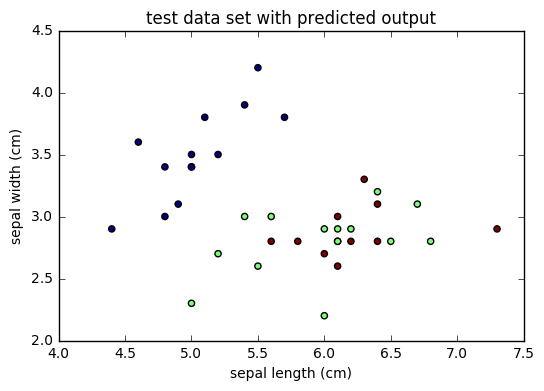

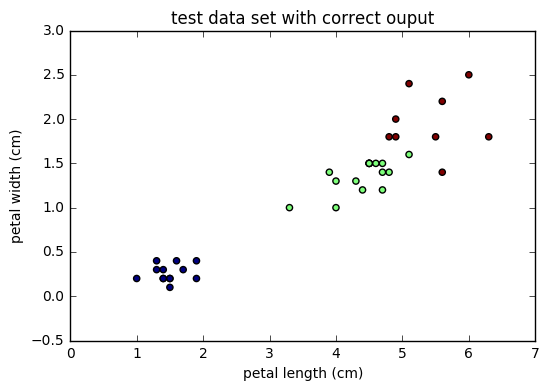

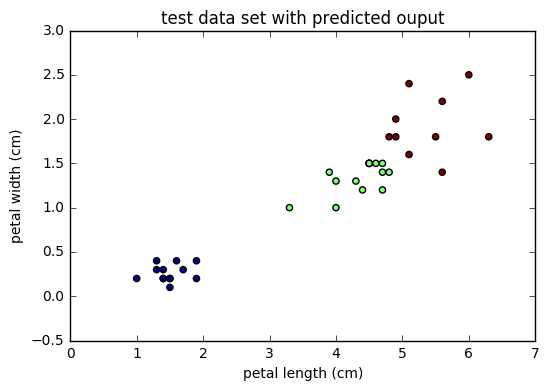

In [66]:
plt.scatter(iris_test["sepal length (cm)"],iris_test["sepal width (cm)"],c=iris_ytest)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("test data set with correct output")
plt.show()
plt.scatter(iris_test["sepal length (cm)"],iris_test["sepal width (cm)"],c=q)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("test data set with predicted output")
plt.show()
plt.scatter(iris_test["petal length (cm)"],iris_test["petal width (cm)"],c=iris_ytest)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("test data set with correct ouput")
plt.show()
plt.scatter(iris_test["petal length (cm)"],iris_test["petal width (cm)"],c=q)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("test data set with predicted ouput")
plt.show()

Here I have done the analysis of the iris dataset using multivariate logistic regression.As previously when I have done the analysis with KNN the accuracy was 89% but with logistic regression the accuracy is upto 97% which indicates that it is a better classifier than KNN in case of iris dataset.